In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# Function to read multiple CSV files from a directory
def read_csv_files(directory):
    dfs = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Read all CSV files for races from the "Races" folder
races = read_csv_files('D:\Guvi\Capstone\Race\Races')

# Read all CSV files for horses from the "Horses" folder
horses = read_csv_files('D:/Guvi/Capstone/Race/Horses')

# Read the single CSV file for forward data
forward = pd.read_csv('D:/Guvi/Capstone/Race/forward.csv')

# Display the first few rows of each dataset
print(races.head())
print(horses.head())
print(forward.head())

C:\Users\admin\AppData\Local\Temp\ipykernel_12276\1038382661.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
C:\Users\admin\AppData\Local\Temp\ipykernel_12276\1038382661.py:7: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


      rid         course   time      date  \
0  271018         Exeter  03:15  90/01/01   
1  275156  Tramore (IRE)  02:00  90/01/01   
2  282203      Catterick  02:45  90/01/01   
3  298761     Cheltenham  02:30  90/01/01   
4  301118        Windsor  03:30  90/01/01   

                                               title rclass   band   ages  \
0  David Garrett Memorial Challenge Trophy Novice...    NaN    NaN  6-8yo   
1              Tattersalls Mares E.B.F. Novice Chase    NaN    NaN    NaN   
2                       Scotch Corner Handicap Chase    NaN  0-125    NaN   
3                           A. S. W. Handicap Hurdle    NaN    NaN    NaN   
4                        Touchen End Handicap Hurdle    NaN  0-115    NaN   

  distance     condition    hurdles                          prizes  \
0     3m1f          Soft  19 fences   [2922.5, 875.0, 420.0, 192.5]   
1       2m          Soft  12 fences                              []   
2    1m7½f  Good To Firm  12 fences          [2238.0,

In [6]:
# Display the first few rows of each dataset
display(races.head())
display(horses.head())
display(forward.head())

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency
0,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,6-8yo,3m1f,Soft,19 fences,"[2922.5, 875.0, 420.0, 192.5]",398.3,4409.0,5028.0,GB,5,0,NaN
1,275156,Tramore (IRE),02:00,90/01/01,Tattersalls Mares E.B.F. Novice Chase,NaN,NaN,NaN,2m,Soft,12 fences,[],267.0,NaN,3218.0,IE,5,0,NaN
2,282203,Catterick,02:45,90/01/01,Scotch Corner Handicap Chase,NaN,0-125,NaN,1m7½f,Good To Firm,12 fences,"[2238.0, 618.0, 294.0]",238.0,3150.0,3116.5,GB,2,0,NaN
3,298761,Cheltenham,02:30,90/01/01,A. S. W. Handicap Hurdle,NaN,NaN,NaN,2m,Good To Firm,NaN,"[5117.0, 1526.0, 728.0, 329.0]",243.8,7700.0,3218.0,GB,2,0,NaN
4,301118,Windsor,03:30,90/01/01,Touchen End Handicap Hurdle,NaN,0-115,NaN,2m6f,Good,NaN,"[2344.8, 652.8, 314.4]",330.7,3312.0,4424.0,GB,1,0,NaN


,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,271018,Combermere,6.0,0.0,0.222222,0,R G Frost,J Frost,1,NaN,...,NaN,Absalom,Queen's Parade,Sovereign Path,14,1.521003,69,1.0,1.0,NaN
1,271018,Royal Battery,6.0,0.0,0.090909,0,D H Barons,S Earle,2,10,...,NaN,Norfolk Air,All At Sea,Man The Rail,14,1.521003,69,0.0,1.0,NaN
2,271018,Just So,7.0,0.0,0.029412,0,J D Roberts,S Burrough,3,15,...,NaN,Sousa,Just Camilla,Ascertain I,14,1.521003,66,0.0,1.0,NaN
3,271018,Mandraki Shuffle,8.0,0.0,0.090909,0,Oliver Sherwood,M Richards,4,20,...,NaN,Mandalus,Indictment,Desert Call,14,1.521003,69,0.0,0.0,NaN
4,271018,Turnberry Dawn,8.0,0.0,0.047619,0,T B Hallett,P Richards,5,dist,...,NaN,Fair Turn,Shuil Alainn,Levanter,14,1.521003,69,0.0,0.0,NaN


,course,countryCode,marketTime,title,runners,condition,prize,rclass,horseName,trainerName,jockeyName,RPRc,TRc,OR,weightSt,weightLb,age,decimalPrice
0,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,All Down To Rosie,Conor O'Dwyer,Kevin Manning,NaN,NaN,NaN,9,2,2,50.000000
1,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Colfer Kay,K J Condon,W J Lee,79.0,70.0,NaN,9,2,2,6.037778
2,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Dha Leath,Garvan Donnelly,J M Sheridan,NaN,NaN,NaN,9,2,2,49.666667
3,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Ellabella,Andrew McNamara,Colin Keane,NaN,NaN,NaN,9,2,2,17.944444
4,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Fermoy,Mrs John Harrington,Tom Madden,73.0,58.0,NaN,9,2,2,17.594737


In [7]:
# Checking for missing values in races DataFrame
races_missing_values = races.isnull().sum()
print("Missing values in Races DataFrame:")
print(races_missing_values)

# Checking for missing values in horses DataFrame
horses_missing_values = horses.isnull().sum()
print("\nMissing values in Horses DataFrame:")
print(horses_missing_values)

# Checking for missing values in forward DataFrame
forward_missing_values = forward.isnull().sum()
print("\nMissing values in Forward DataFrame:")
print(forward_missing_values)

Missing values in Races DataFrame:
rid                 0
course              0
time                0
date                0
title               1
rclass         152992
band           231309
ages            13054
distance            0
condition          48
hurdles        274953
prizes              0
winningTime         0
prize           19708
metric              0
countryCode         0
ncond               0
class               0
currency       387291
dtype: int64

Missing values in Horses DataFrame:
rid                   0
horseName             0
age                 309
saddle           179168
decimalPrice          0
isFav                 0
trainerName        2850
jockeyName          125
position              0
positionL        783662
dist            1074385
weightSt              0
weightLb              0
overWeight      4012988
outHandicap     3994332
headGear        3119695
RPR              864877
TR              1681610
OR              1795263
father             1289
mother           

In [8]:
# Dropping specified columns from races DataFrame
races.drop(columns=['rclass', 'band', 'hurdles', 'currency', 'ages' , 'prize'], inplace=True)

# Dropping specified columns from horses DataFrame
horses.drop(columns=['price', 'headGear', 'TR', 'OR', 'outHandicap', 'overWeight' ,'saddle', 'RPR' , 'dist' , 'positionL' , 'gfather' ,'price'], inplace=True)

# Dropping specified columns from forward DataFrame
forward.drop(columns=['OR', 'TRc', 'RPRc', 'rclass'], inplace=True)

In [9]:
# Calculate the mode of the 'condition' column
mode_condition = races['condition'].mode()[0]

# Fill null values in the 'condition' column with the mode value
races['condition'].fillna(mode_condition, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12276\3358997844.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  races['condition'].fillna(mode_condition, inplace=True)


In [11]:
# Fill null values in the 'age' column using mean
mean_age = horses['age'].mean()
horses['age'].fillna(mean_age, inplace=True)

# Fill null values in the specified columns using mode
mode_columns = ['mother', 'father', 'jockeyName', 'trainerName']
for column in mode_columns:
    mode_value = horses[column].mode()[0]
    horses[column].fillna(mode_value, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12276\3200140629.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  horses['age'].fillna(mean_age, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_12276\3200140629.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [12]:
# Fill null values in the specified columns using mode
mode_columns = ['course', 'condition', 'jockeyName']
for column in mode_columns:
    mode_value = forward[column].mode()[0]
    forward[column].fillna(mode_value, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12276\164072355.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  forward[column].fillna(mode_value, inplace=True)


In [13]:
# Checking for missing values in races DataFrame
races_missing_values = races.isnull().sum()
print("Missing values in Races DataFrame:")
print(races_missing_values)

# Checking for missing values in horses DataFrame
horses_missing_values = horses.isnull().sum()
print("\nMissing values in Horses DataFrame:")
print(horses_missing_values)

# Checking for missing values in forward DataFrame
forward_missing_values = forward.isnull().sum()
print("\nMissing values in Forward DataFrame:")
print(forward_missing_values)

Missing values in Races DataFrame:
rid            0
course         0
time           0
date           0
title          1
distance       0
condition      0
prizes         0
winningTime    0
metric         0
countryCode    0
ncond          0
class          0
dtype: int64

Missing values in Horses DataFrame:
rid             0
horseName       0
age             0
decimalPrice    0
isFav           0
trainerName     0
jockeyName      0
position        0
weightSt        0
weightLb        0
father          0
mother          0
runners         0
margin          0
weight          0
res_win         0
res_place       0
dtype: int64

Missing values in Forward DataFrame:
course          0
countryCode     0
marketTime      0
title           0
runners         0
condition       0
prize           0
horseName       0
trainerName     0
jockeyName      0
weightSt        0
weightLb        0
age             0
decimalPrice    0
dtype: int64


In [14]:
# Merge the race and horse datasets on the 'rid' column
merged_data = pd.merge(races, horses, on='rid')

In [15]:
column_names = merged_data.columns
print(column_names)

Index(['rid', 'course', 'time', 'date', 'title', 'distance', 'condition',
       'prizes', 'winningTime', 'metric', 'countryCode', 'ncond', 'class',
       'horseName', 'age', 'decimalPrice', 'isFav', 'trainerName',
       'jockeyName', 'position', 'weightSt', 'weightLb', 'father', 'mother',
       'runners', 'margin', 'weight', 'res_win', 'res_place'],
      dtype='object')


# EDA

In [16]:
# Descriptive statistics
print(merged_data.describe())

                rid   winningTime        metric         class           age  \
count  4.107315e+06  4.107315e+06  4.107315e+06  4.107315e+06  4.107315e+06   
mean   2.079191e+05  1.760163e+02  2.489754e+03  2.521013e+00  4.913815e+00   
std    1.199290e+05  1.039372e+02  1.213905e+03  2.375500e+00  2.246027e+00   
min    0.000000e+00  0.000000e+00  8.040000e+02  0.000000e+00 -1.700000e+01   
25%    1.036025e+05  8.850000e+01  1.407000e+03  0.000000e+00  3.000000e+00   
50%    2.086340e+05  1.314800e+02  2.011000e+03  3.000000e+00  4.000000e+00   
75%    3.117560e+05  2.539000e+02  3.318500e+03  5.000000e+00  6.000000e+00   
max    4.150900e+05  5.552530e+03  7.340500e+03  7.000000e+00  2.700000e+01   

       decimalPrice         isFav      position      weightSt      weightLb  \
count  4.107315e+06  4.107315e+06  4.107315e+06  4.107315e+06  4.107315e+06   
mean   1.175573e-01  1.044334e-01  8.532958e+00  9.237648e+00  6.141118e+00   
std    1.140435e-01  3.058220e-01  9.464667e+00  1.

In [17]:
merged_data.head()

,rid,course,time,date,title,distance,condition,prizes,winningTime,metric,...,position,weightSt,weightLb,father,mother,runners,margin,weight,res_win,res_place
0,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",398.3,5028.0,...,1,11,0,Absalom,Queen's Parade,14,1.521003,69,1.0,1.0
1,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",398.3,5028.0,...,2,11,0,Norfolk Air,All At Sea,14,1.521003,69,0.0,1.0
2,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",398.3,5028.0,...,3,10,7,Sousa,Just Camilla,14,1.521003,66,0.0,1.0
3,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",398.3,5028.0,...,4,11,0,Mandalus,Indictment,14,1.521003,69,0.0,0.0
4,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",398.3,5028.0,...,5,11,0,Fair Turn,Shuil Alainn,14,1.521003,69,0.0,0.0


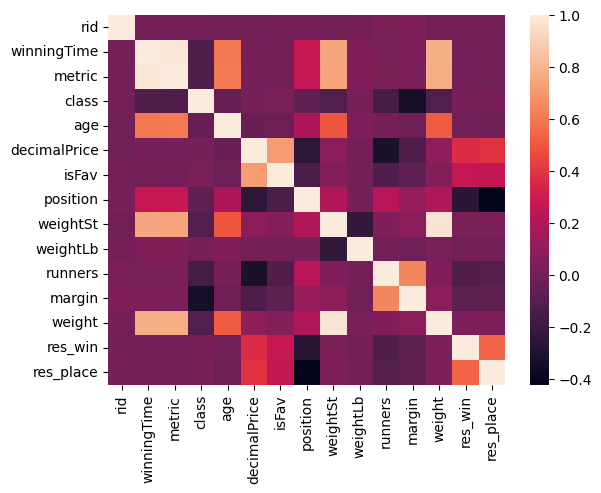

In [18]:
# Exclude non-numeric columns
numeric_columns = merged_data.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=False)
plt.show()

# Plots to visualize Data Distribution

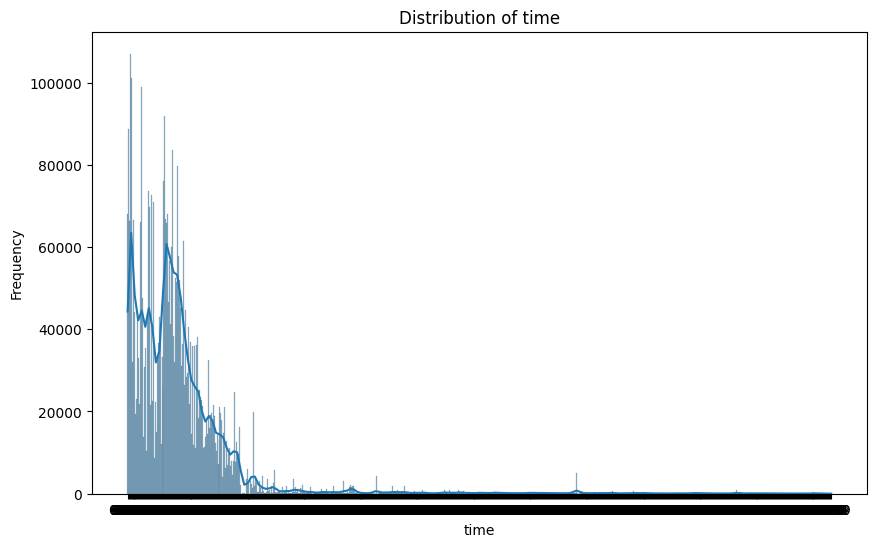

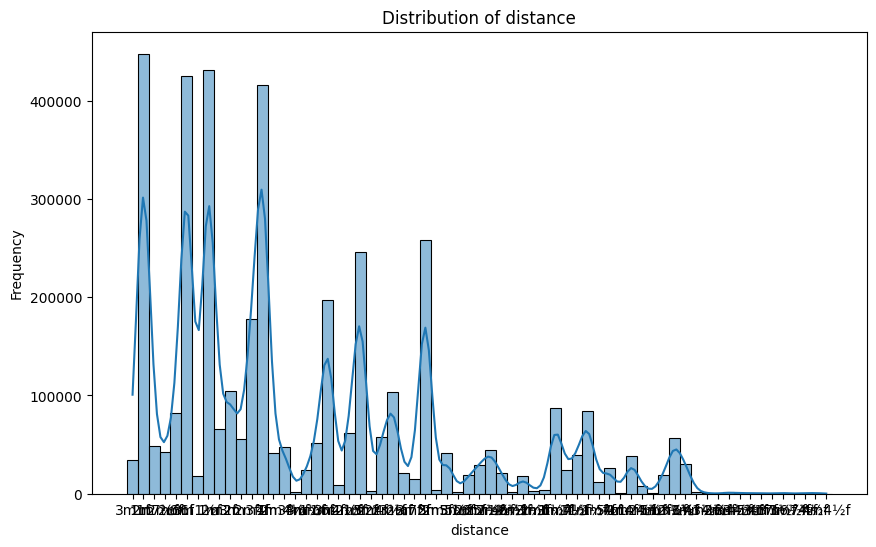

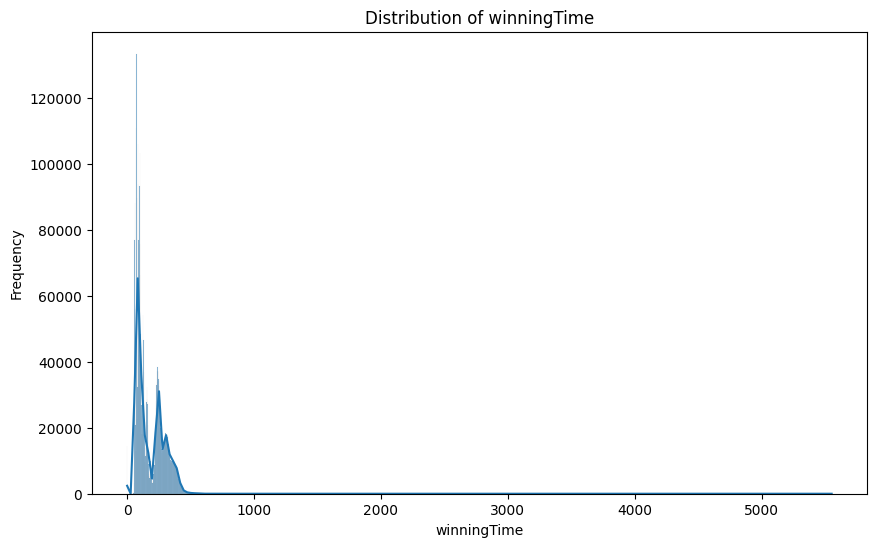

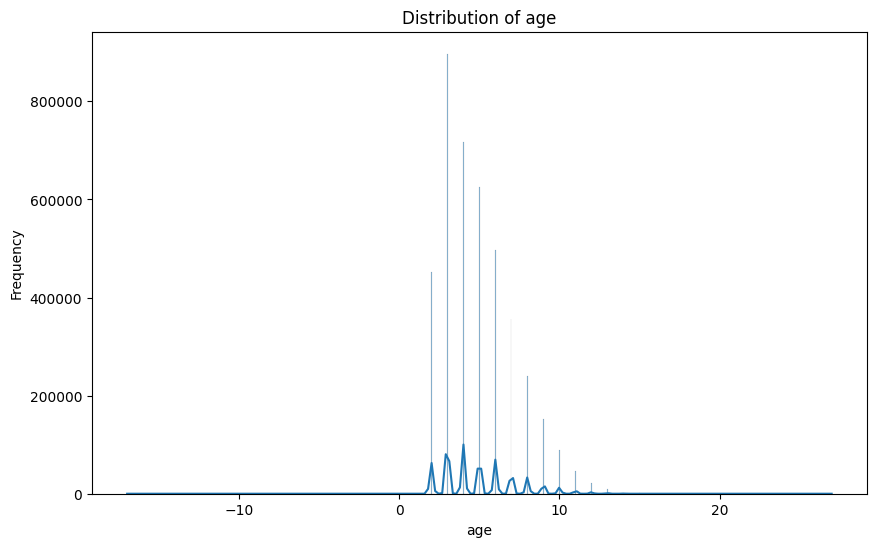

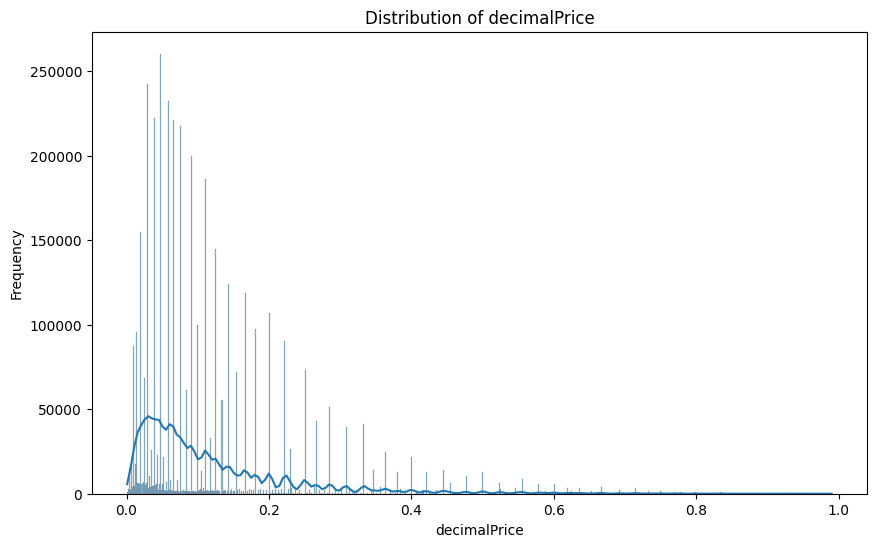

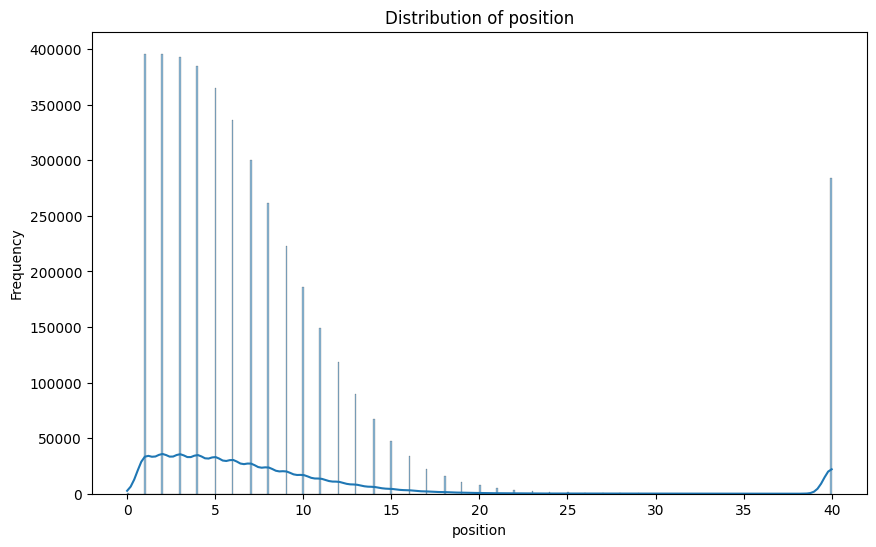

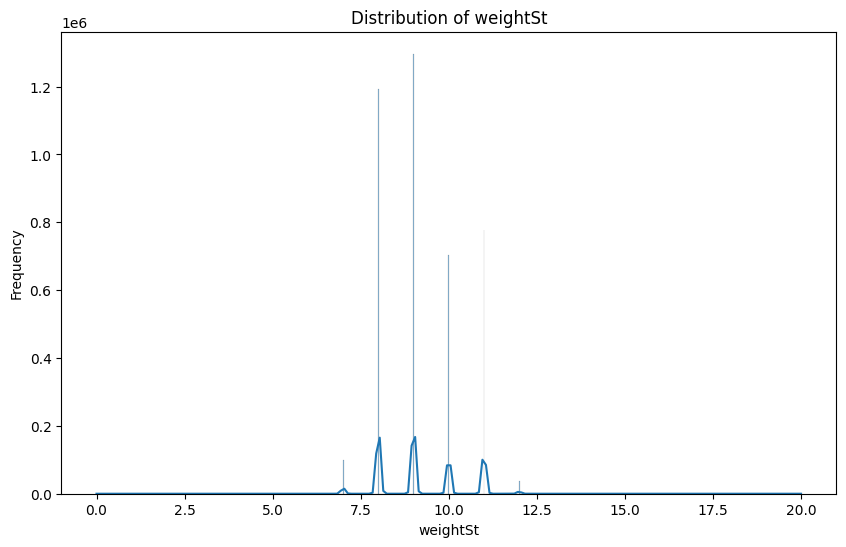

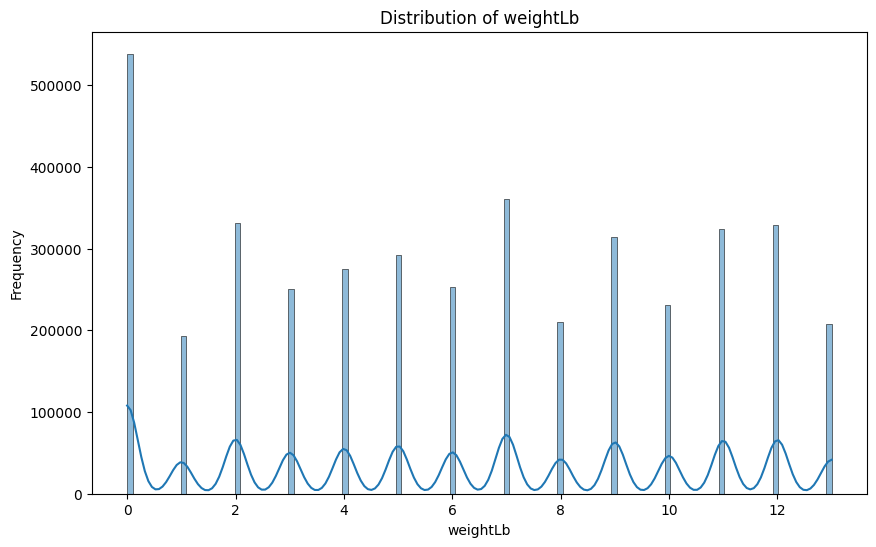

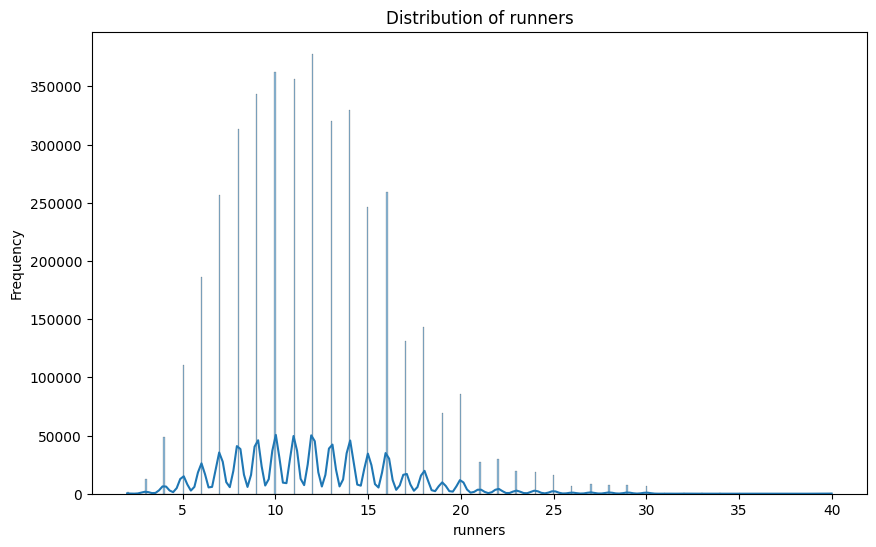

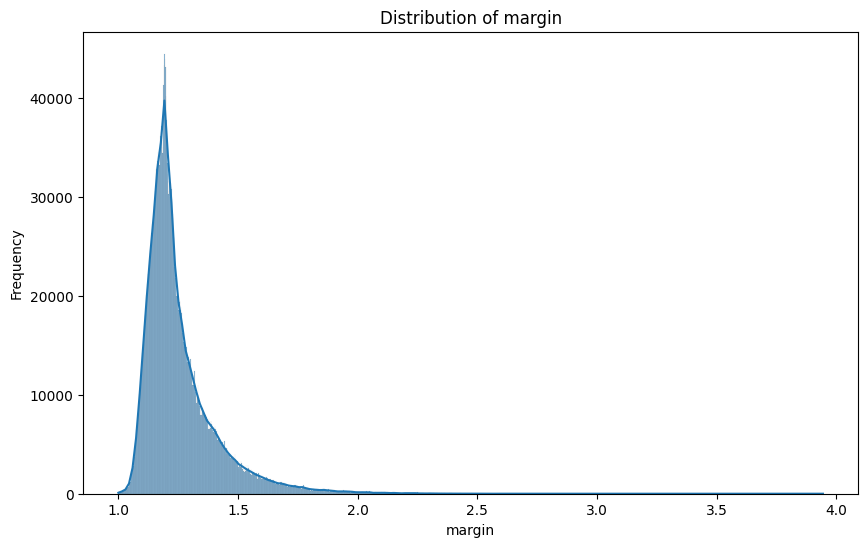

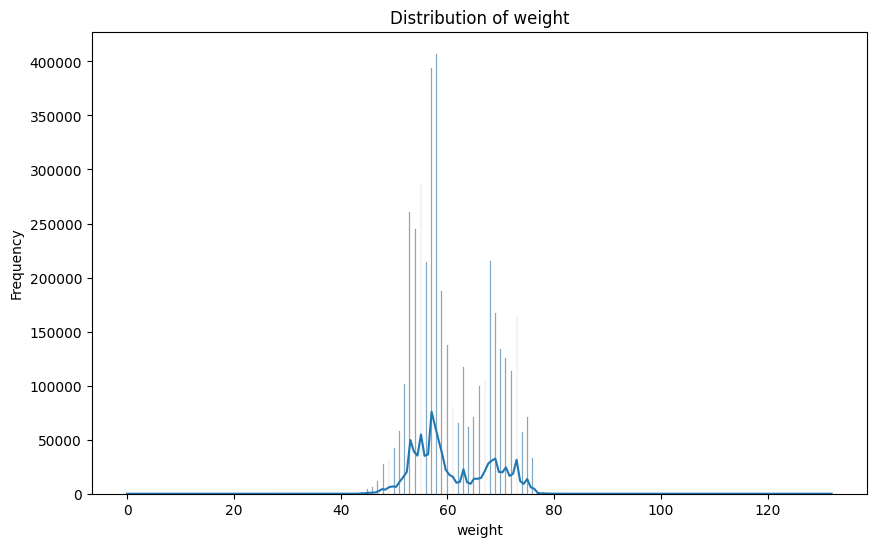

In [24]:
# Assuming merged_data is your DataFrame
continuous_varss = ['time', 'distance', 'winningTime', 'age', 'decimalPrice', 'position', 'weightSt', 'weightLb', 'runners', 'margin', 'weight']

for var in continuous_varss:
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

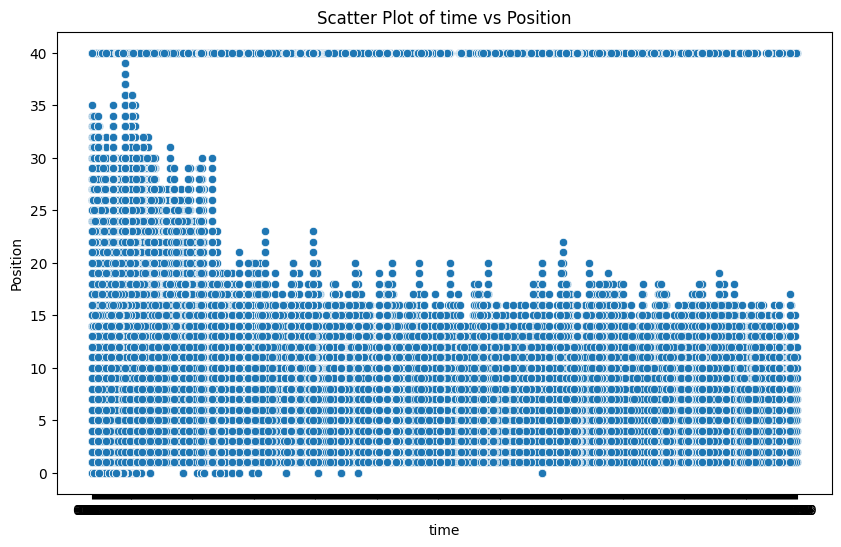

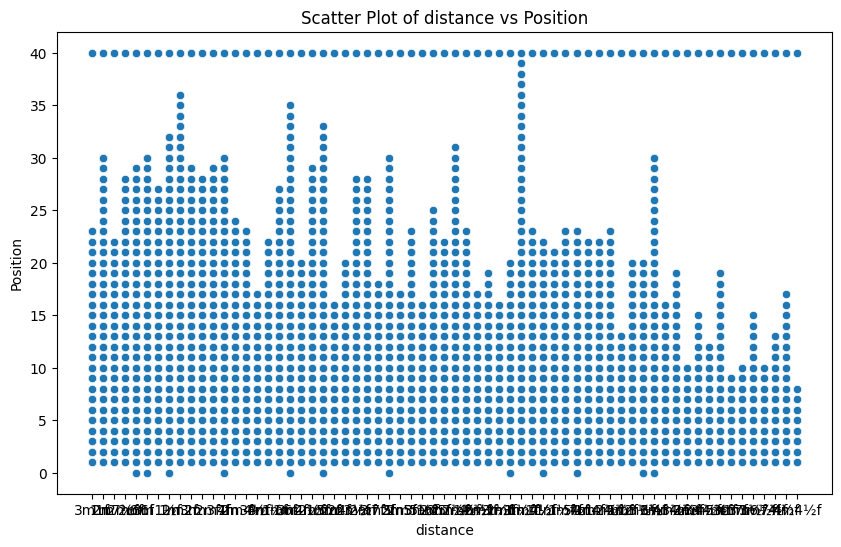

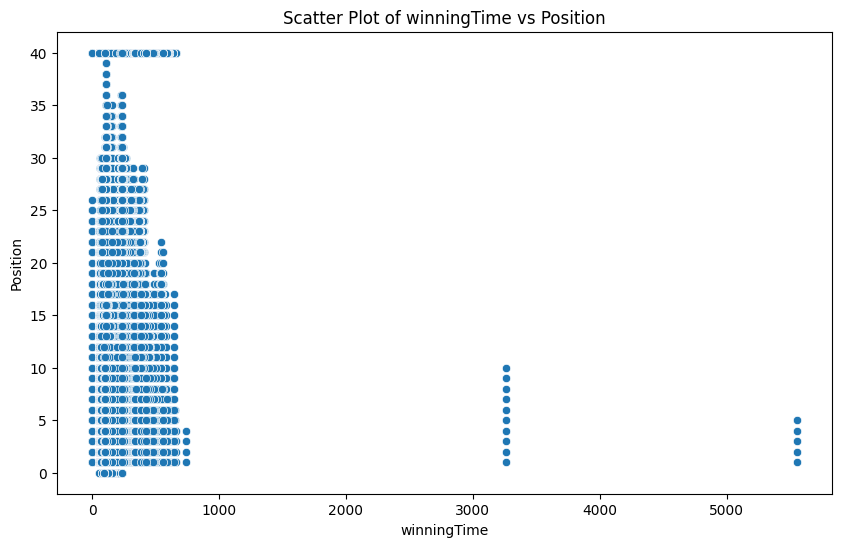

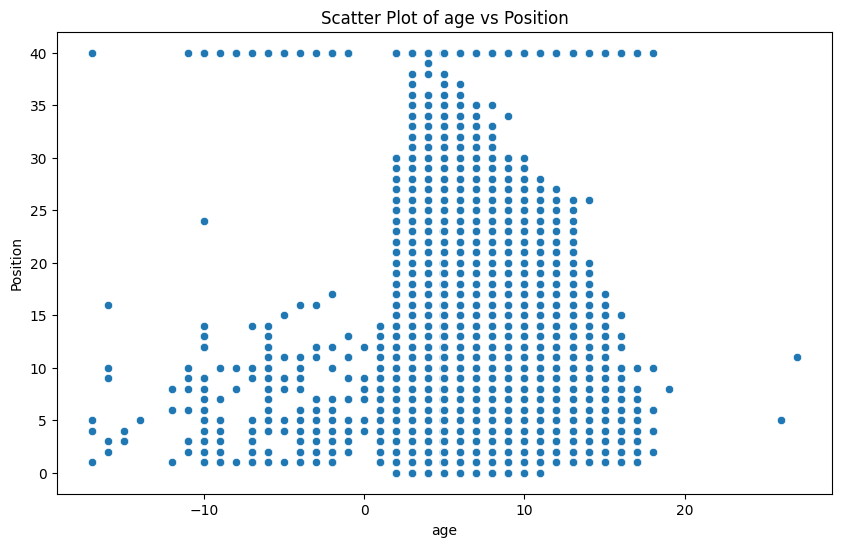

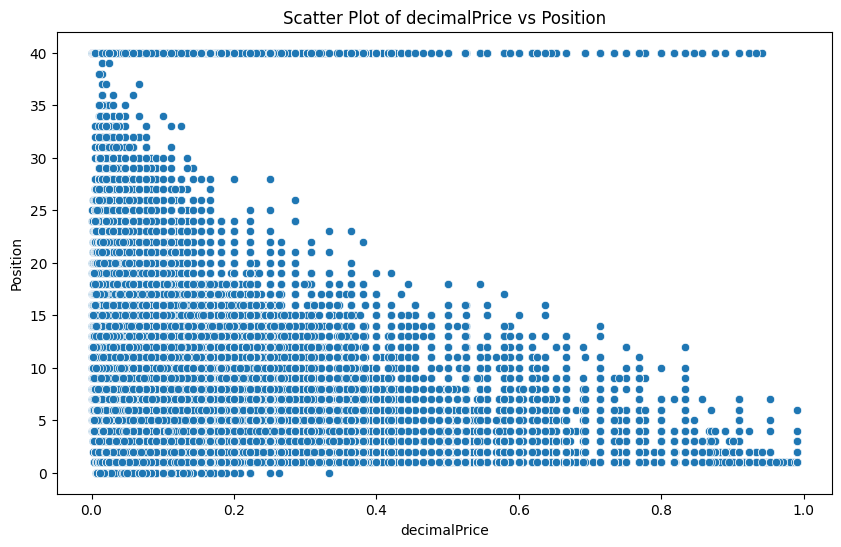

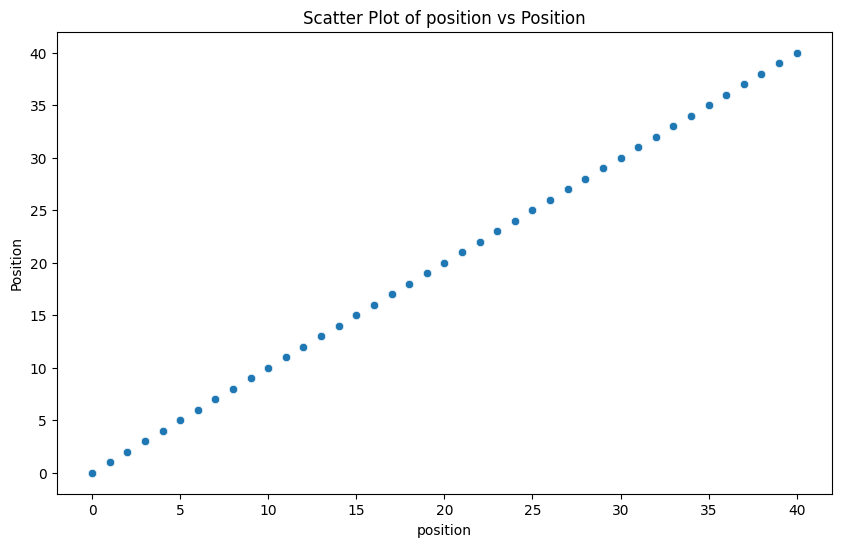

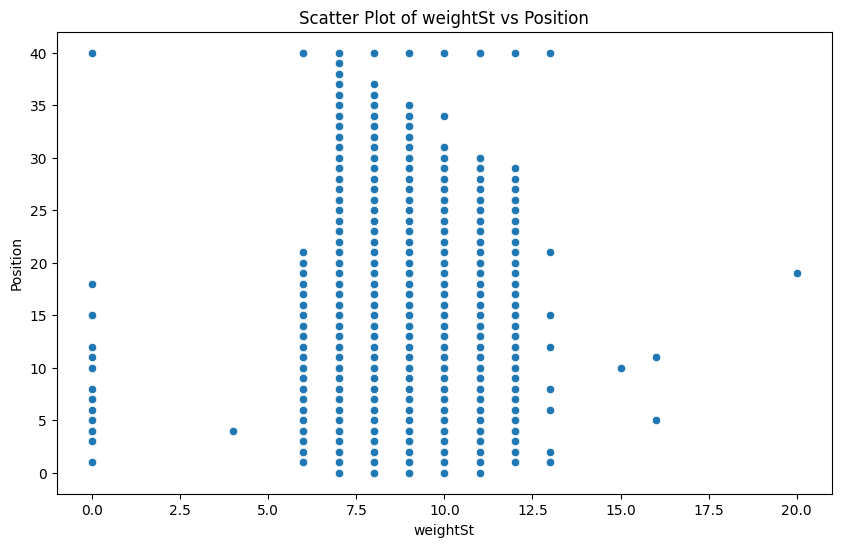

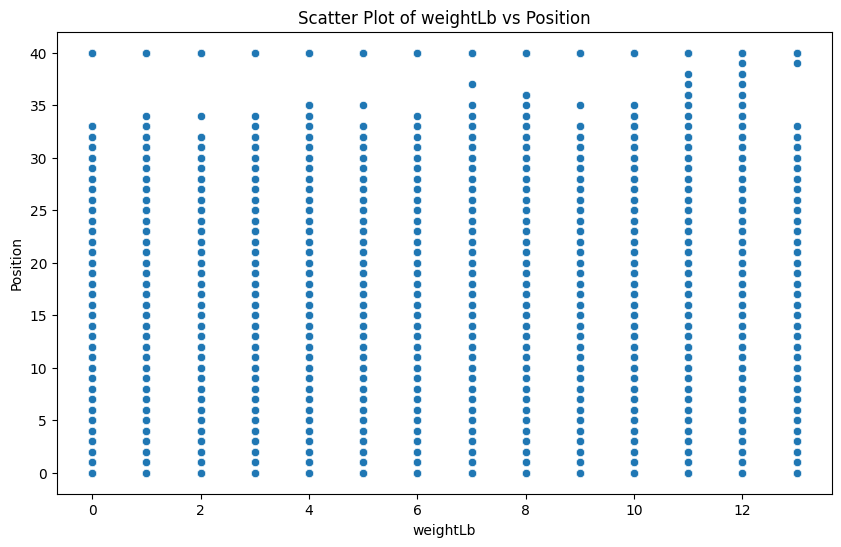

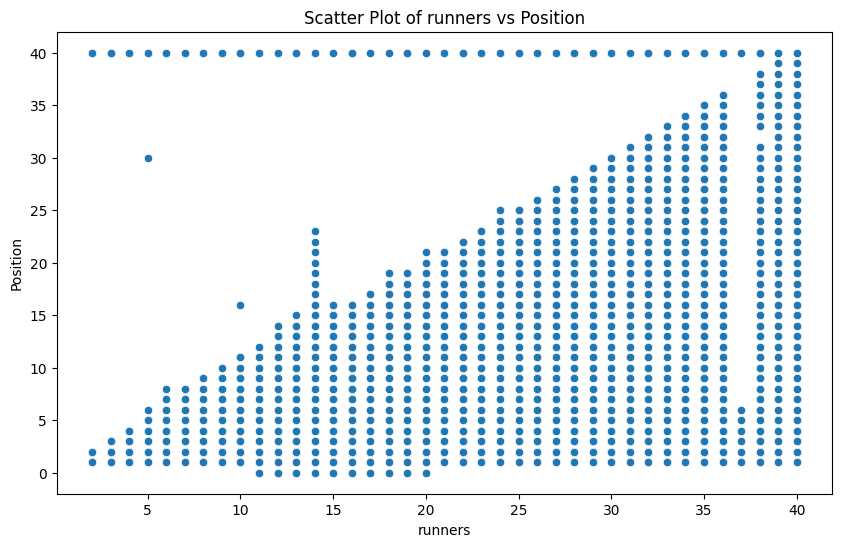

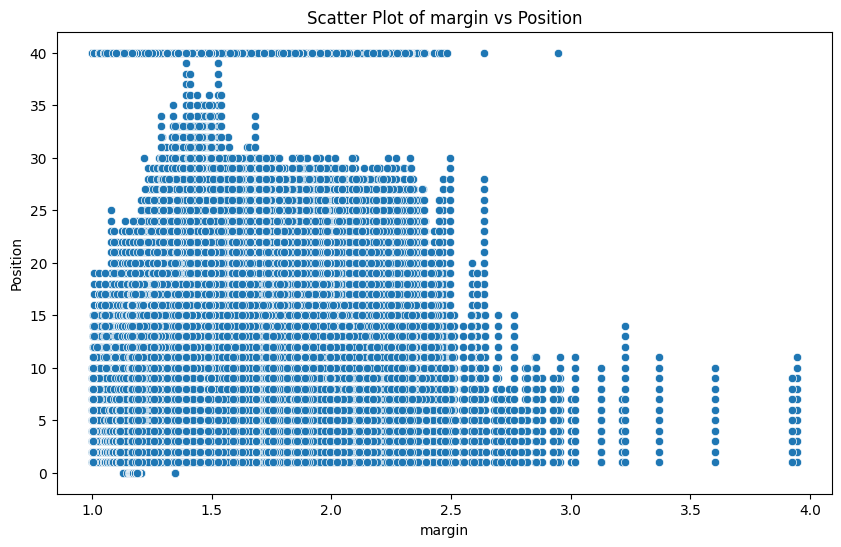

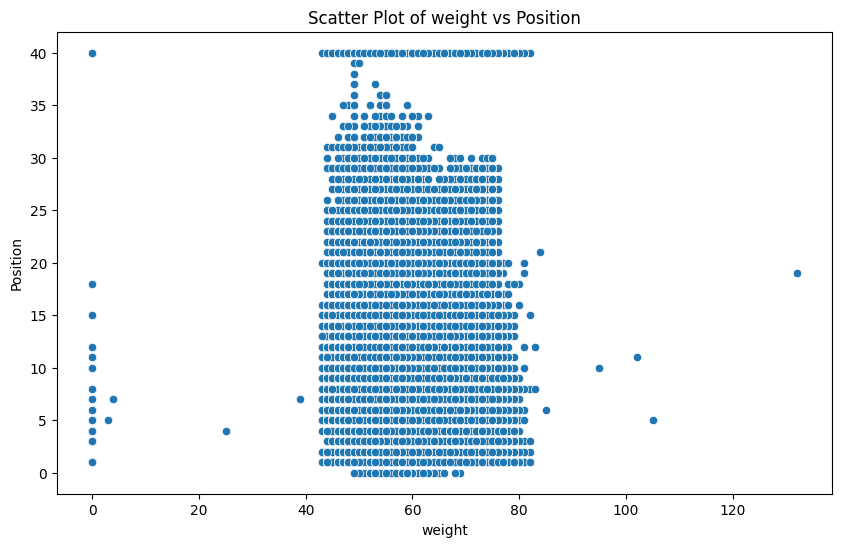

In [25]:
for var in continuous_varss:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=merged_data[var], y=merged_data['position'])
    plt.title(f'Scatter Plot of {var} vs Position')
    plt.xlabel(var)
    plt.ylabel('Position')
    plt.show()

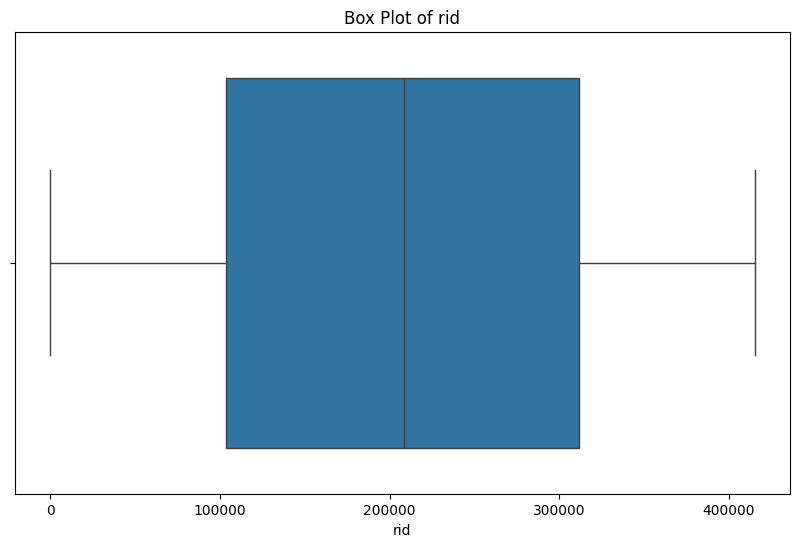

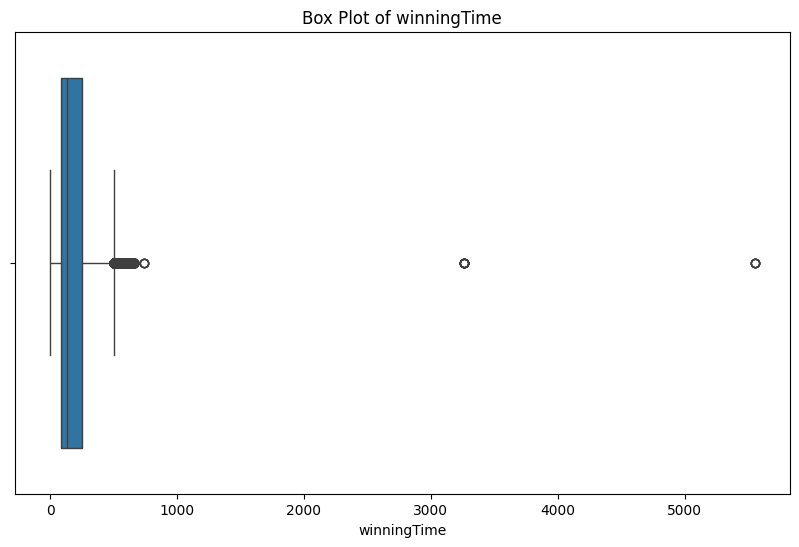

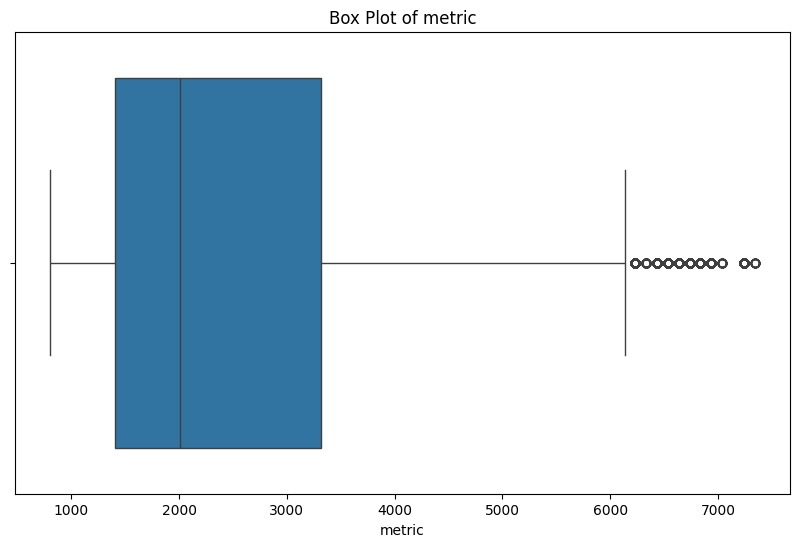

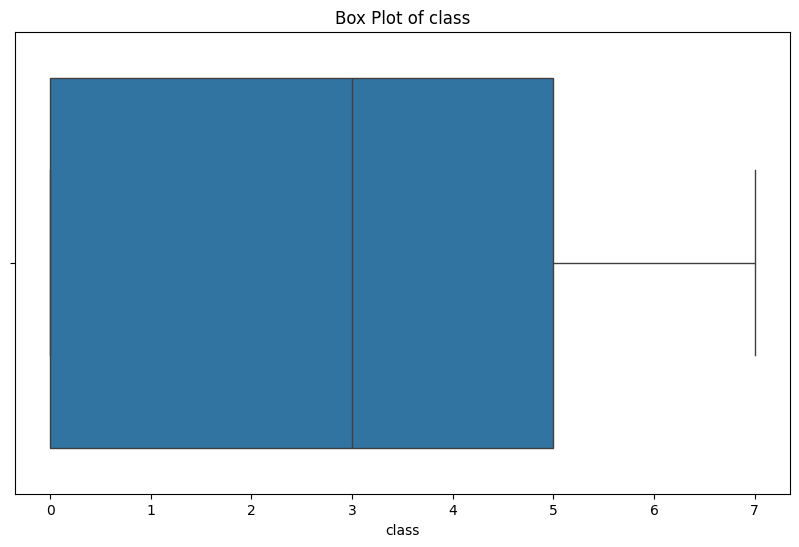

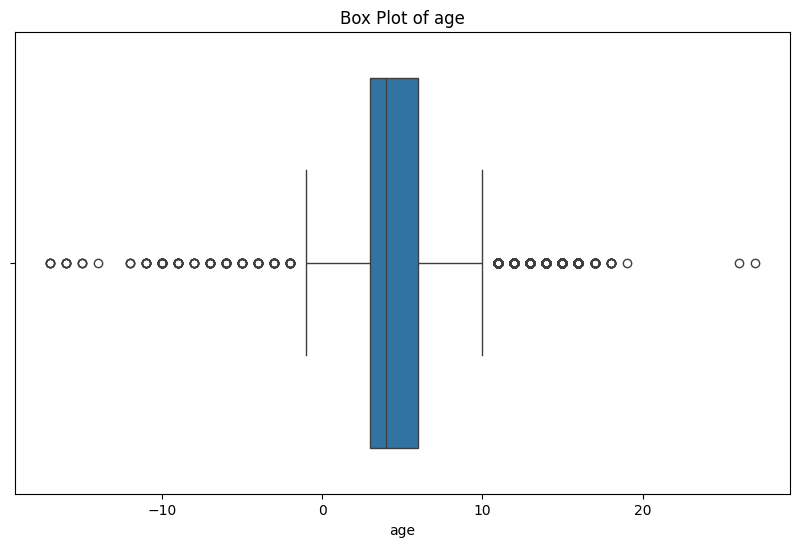

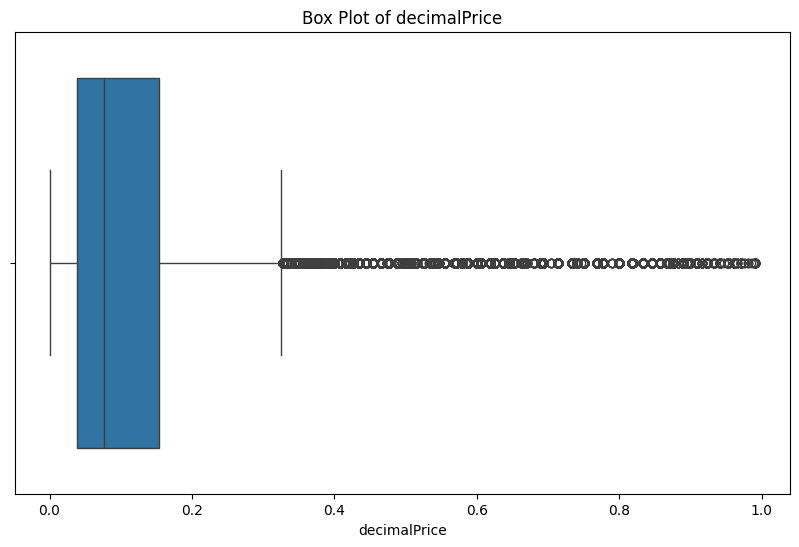

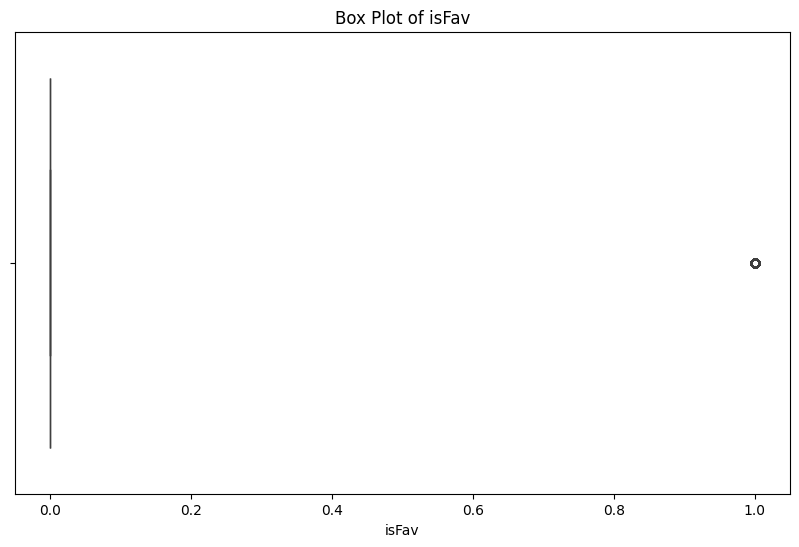

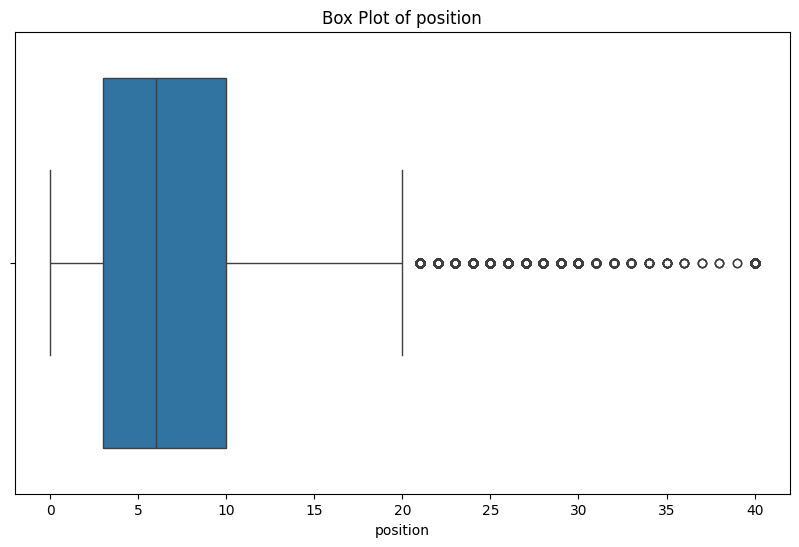

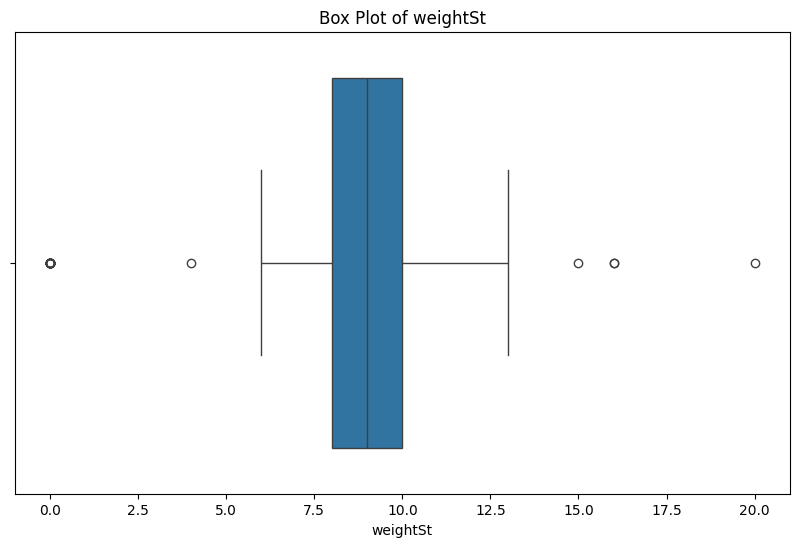

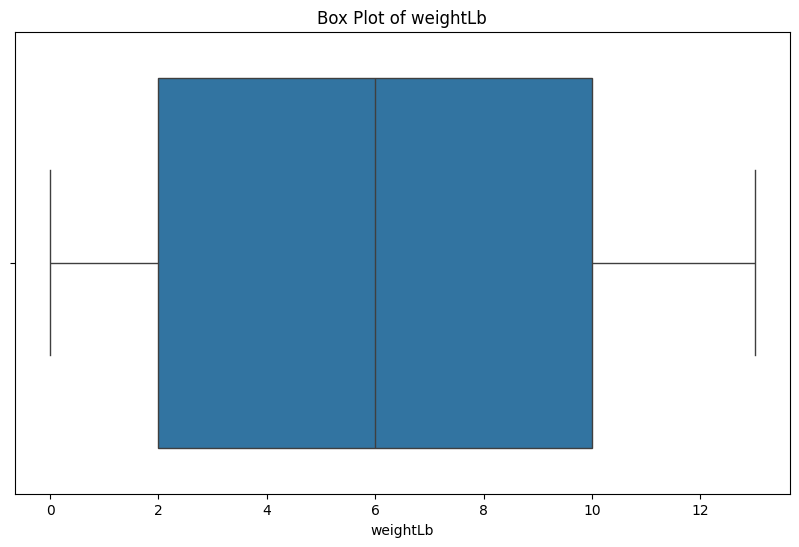

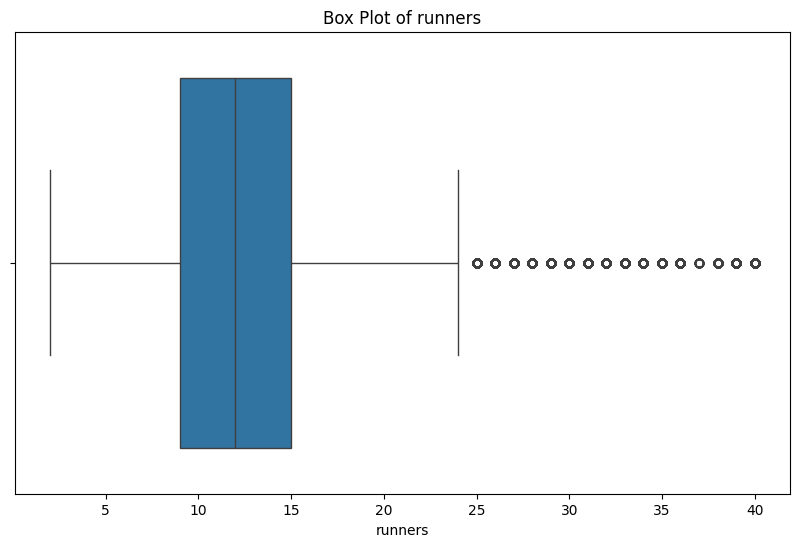

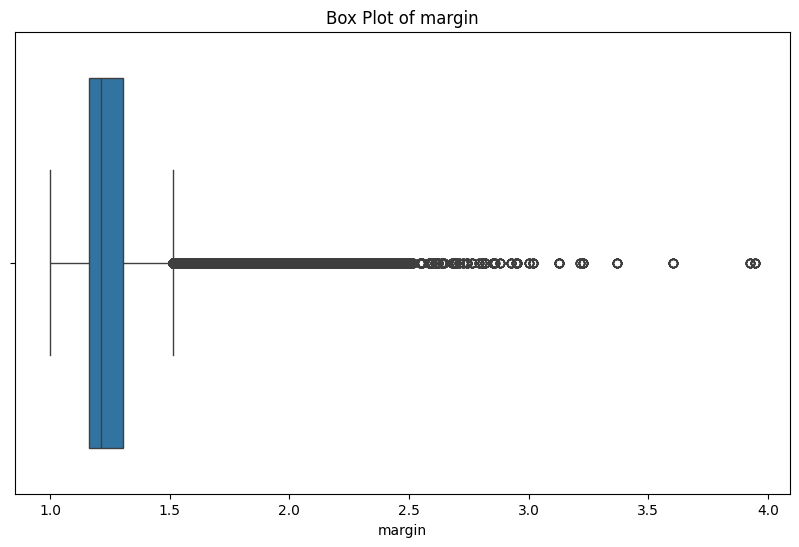

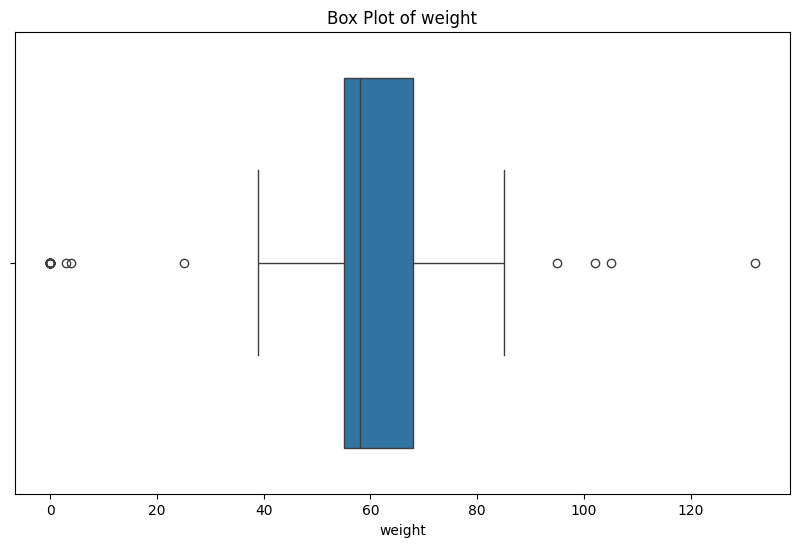

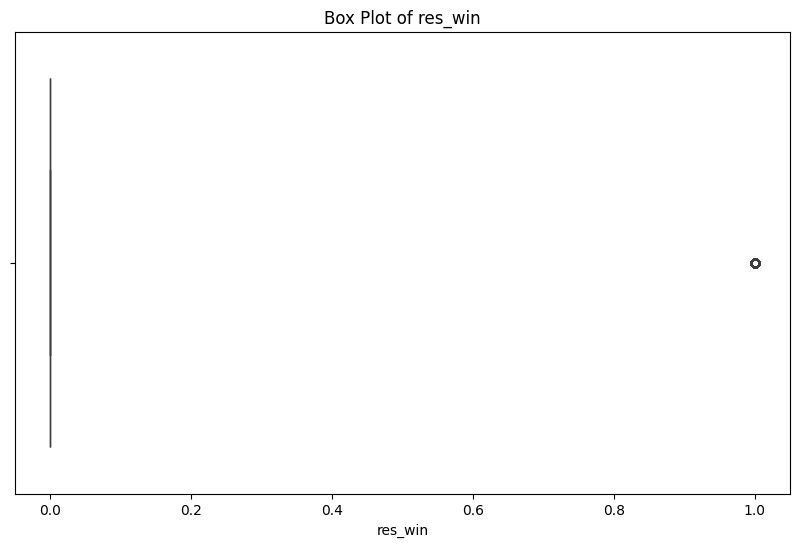

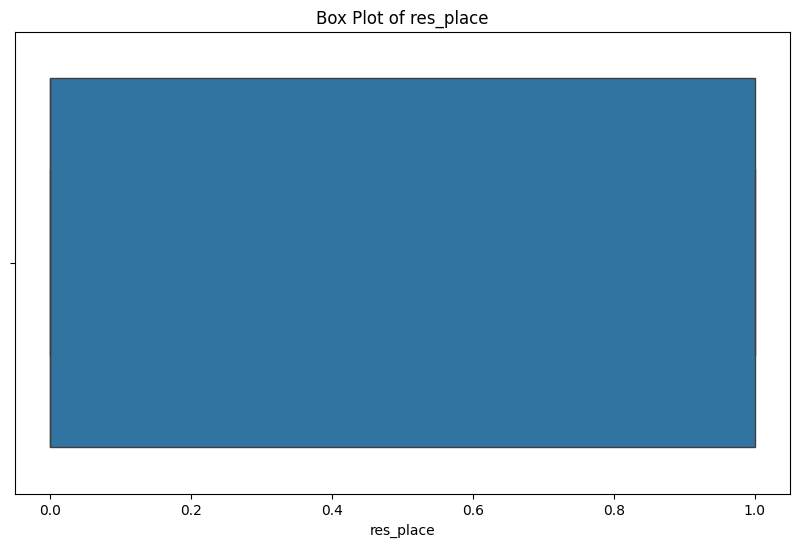

In [21]:
continuous_vars = merged_data.select_dtypes(include=np.number).columns

for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=merged_data[var])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()


In [26]:
print(merged_data[continuous_varss].dtypes)

time             object
distance         object
winningTime     float64
age             float64
decimalPrice    float64
position          int64
weightSt          int64
weightLb          int64
runners           int64
margin          float64
weight            int64
dtype: object


In [22]:
print(merged_data[continuous_vars].dtypes)

rid               int64
winningTime     float64
metric          float64
class             int64
age             float64
decimalPrice    float64
isFav             int64
position          int64
weightSt          int64
weightLb          int64
runners           int64
margin          float64
weight            int64
res_win         float64
res_place       float64
dtype: object


In [23]:
print(merged_data.dtypes)

rid               int64
course           object
time             object
date             object
title            object
distance         object
condition        object
prizes           object
winningTime     float64
metric          float64
countryCode      object
ncond            object
class             int64
horseName        object
age             float64
decimalPrice    float64
isFav             int64
trainerName      object
jockeyName       object
position          int64
weightSt          int64
weightLb          int64
father           object
mother           object
runners           int64
margin          float64
weight            int64
res_win         float64
res_place       float64
dtype: object


In [27]:
# Convert 'time' and 'distance' columns to numeric
merged_data['time'] = pd.to_numeric(merged_data['time'], errors='coerce')
merged_data['distance'] = pd.to_numeric(merged_data['distance'], errors='coerce')

In [29]:
# Selecting relevant continuous features and the target variable
continuous = ['time', 'distance', 'winningTime', 'age', 'decimalPrice', 
                   'weightSt', 'weightLb', 'runners', 'margin', 'weight']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(merged_data[continuous])
y = merged_data['position']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

d:\Guvi\Capstone\.venv\lib\site-packages\sklearn\impute\_base.py:597: UserWarning: Skipping features without any observed values: ['time' 'distance']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
